In [34]:
"""Process comparison of healthy and impaired for PLOS."""
import os
import argparse
import sys
sys.path.append('..')
from bayescmd.results_handling import comparison_kde_plot
from bayescmd.results_handling import data_import
from bayescmd.abc import import_actual_data
from bayescmd.abc import priors_creator
from bayescmd.util import findBaseDir
import json
from distutils import dir_util

BASEDIR = os.path.abspath(findBaseDir('BayesCMD'))

%matplotlib inline

STARTING AT: /home/buck06191/repos/GitHub/BayesCMD/bayescmd
 Looking for: BayesCMD


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
healthy_Dir = "/home/buck06191/Dropbox/phd/PLOS_paper/data/parameters/healthy/wide_params/euclidean_SA"
healthy_pfile = os.path.abspath(os.path.join(healthy_Dir, 'all_parameters.csv'))

config_file="../examples/configuration_files/varying_parameter_wide_config.json"
with open(config_file, 'r') as conf_f:
    conf = json.load(conf_f)
params = conf['priors']

input_path = os.path.join(BASEDIR,
                          'PLOS_paper',
                          'data',
                          'simulated_smooth_combined_ABP.csv')

d0 = import_actual_data(input_path)

targets = conf['targets']
model_name = conf['model_name']
inputs = conf['inputs']

config = {
    "model_name": model_name,
    "targets": targets,
    "inputs": inputs,
    "parameters": params,
    "input_path": input_path,
    "zero_flag": {k: False for k in targets}
}

results_healthy = data_import(healthy_pfile)


Number of lines:	1100000
Number of NaN values:	0


In [18]:
d0['t']

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0

In [56]:
test_selection = results_healthy.sort_values(by='NRMSE').head(100)[list(config['parameters'].keys())]

In [57]:
len(test_selection)

100

In [5]:
from dtaidistance import dtw

In [28]:
from bayescmd.results_handling import run_model
from bayescmd.bcmdModel import ModelBCMD
from bayescmd.abc import inputParse

In [59]:
model_name = config['model_name']
inputs= config['inputs']
targets= config['targets']
times = d0['t']

input_data = inputParse(d0, inputs)
outputs = []
for i in range(len(test_selection)):
    p = dict(test_selection.iloc[i,:])
    model = ModelBCMD(model_name, inputs=input_data, params=p, times=times, outputs=targets)
    outputs.append(run_model(model))

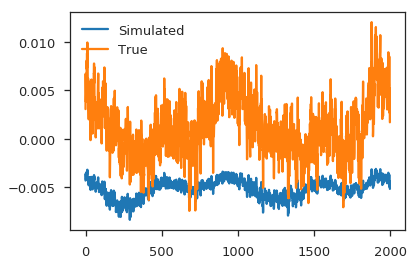

In [36]:
fig, ax = plt.subplots(1)
ax.plot(outputs[0]['CCO'], label='Simulated')
ax.plot(d0['CCO'], label='True')
ax.legend()

In [60]:
s1 = np.array(d0['CCO'], dtype=np.double)
distances = []
for d in outputs:
    s2=np.array(d['CCO'], dtype=np.double)
    distances.append(dtw.distance_fast(s1, s2))




In [65]:
DTW = pd.Series(distances)

In [75]:
top_NRMSE=results_healthy.sort_values(by='NRMSE').head(100)['CCO_NRMSE']

In [86]:
top_NRMSE = top_NRMSE.sort_values()
top_NRMSE.index=range(100)
for ii in range(100):
    print(top_NRMSE.index[ii], DTW.sort_values().index[ii])

0 77
1 41
2 9
3 72
4 68
5 32
6 38
7 21
8 71
9 55
10 82
11 1
12 86
13 42
14 24
15 44
16 60
17 48
18 10
19 57
20 0
21 27
22 59
23 28
24 79
25 35
26 99
27 36
28 13
29 16
30 11
31 5
32 85
33 8
34 34
35 19
36 96
37 58
38 64
39 76
40 17
41 53
42 94
43 78
44 39
45 22
46 25
47 95
48 87
49 20
50 4
51 62
52 81
53 3
54 69
55 14
56 51
57 7
58 47
59 45
60 2
61 61
62 46
63 67
64 73
65 43
66 33
67 84
68 52
69 40
70 88
71 37
72 83
73 63
74 29
75 6
76 92
77 56
78 30
79 90
80 23
81 65
82 12
83 26
84 70
85 74
86 75
87 49
88 18
89 91
90 54
91 31
92 89
93 50
94 80
95 15
96 97
97 66
98 98
99 93


In [ ]:
top_NRMSE

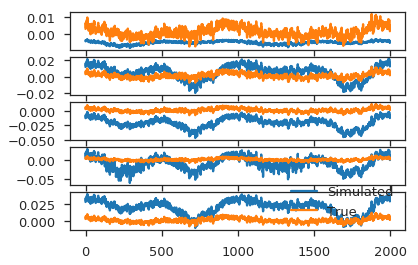

In [55]:
fig, ax = plt.subplots(nrows=5)
for ii in range(len(test_selection)):
    ax[ii].plot(outputs[ii]['CCO'], label='Simulated')
    ax[ii].plot(d0['CCO'], label='True')
ax[ii].legend()

In [102]:
data1 = [[0.0, 0, 1, 2, 1, 0, 1, 0, 0],
    [0.0, 1, 2, 0, 0, 0, 0, 0, 0],
    [0.0, 0, 1, 2, 1, 0, 0, 0, 0]]
data2 = [[0.0, 0, 1, 2, 2, 0, 0, 0, 0],
    [0.0, 1, 2, 1, 0, 0, 0, 0, 0],
    [0.0, 0, 1, 2, 1, 0, 0, 0, 0]]

data1.extend(data2)
series = np.matrix(data1)
print(series)
ds = dtw.distance_matrix_fast(series)

[[ 0.  0.  1.  2.  1.  0.  1.  0.  0.]
 [ 0.  1.  2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  2.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  2.  2.  0.  0.  0.  0.]
 [ 0.  1.  2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  2.  1.  0.  0.  0.  0.]]


In [98]:
ds

array([[        inf,  1.41421356,  1.        ,  1.41421356,  1.        ,
         1.        ],
       [        inf,         inf,  1.        ,  0.        ,  1.        ,
         1.        ],
       [        inf,         inf,         inf,  1.        ,  0.        ,
         0.        ],
       [        inf,         inf,         inf,         inf,  1.        ,
         1.        ],
       [        inf,         inf,         inf,         inf,         inf,
         0.        ],
       [        inf,         inf,         inf,         inf,         inf,
                inf]])

In [106]:
data1 = [[0.0, 0, 1, 2, 1, 0, 1, 0, 0],
    [0.0, 1, 2, 0, 0, 0, 0, 0, 0],
    [0.0, 0, 1, 2, 1, 0, 0, 0, 0]]
data2 = [[0.0, 0, 1, 2, 2, 0, 0, 0, 0],
    [0.0, 1, 2, 1, 0, 0, 0, 0, 0],
    [0.0, 0, 1, 2, 1, 0, 0, 0, 0]]
disty= []
for ii in range(len(data1)):
    disty.append(dtw.distance_fast(np.array(data1[ii], dtype=np.double), np.array(data2[ii])))

In [107]:
disty

[1.4142135623730951, 1.0, 0.0]